In [8]:
using FourierFlows
using CairoMakie
using AbstractFFTs
using Printf
using JLD2
include("./AnalysisUtils.jl")

mapfilter_snapshots (generic function with 1 method)

In [27]:
run_directory = "/vast/nad9961/lrsw/1235390/"
Nsnapshots = count_key_snapshots(run_directory, "rsw")
ts = zeros(Nsnapshots-1)
#uh = zeros(Complex{Float64}, Nsnapshots-1)
#vh = zeros(Complex{Float64}, Nsnapshots-1)
#ηh = zeros(Complex{Float64}, Nsnapshots-1)
for i=2:Nsnapshots
    t, sol = load_key_snapshot(run_directory, "rsw", i)
    ts[i-1] = t
    #uh[i-1] = sol[23, 45, 1]
    #vh[i-1] = sol[23, 45, 2]
    #ηh[i-1] = sol[23, 45, 3]
end

In [24]:
window = @. 0.5*(1 - cos(2*π*(1:(Nsnapshots))/(Nsnapshots)))
window = window[1:end-1]

5434-element Vector{Float64}:
 3.341185593752627e-7
 1.3364737909138391e-6
 3.007064355076139e-6
 5.345888019092637e-6
 8.35294165718592e-6
 1.2028221250570681e-5
 1.6371721887287194e-5
 2.138343776231233e-5
 2.706336217767058e-5
 3.341148754232304e-5
 4.042780537205637e-5
 4.81123062898714e-5
 5.646498002553901e-5
 ⋮
 4.81123062898714e-5
 4.042780537205637e-5
 3.341148754232304e-5
 2.706336217767058e-5
 2.138343776231233e-5
 1.6371721887287194e-5
 1.2028221250570681e-5
 8.35294165718592e-6
 5.345888019092637e-6
 3.007064355076139e-6
 1.3364737909138391e-6
 3.341185593752627e-7

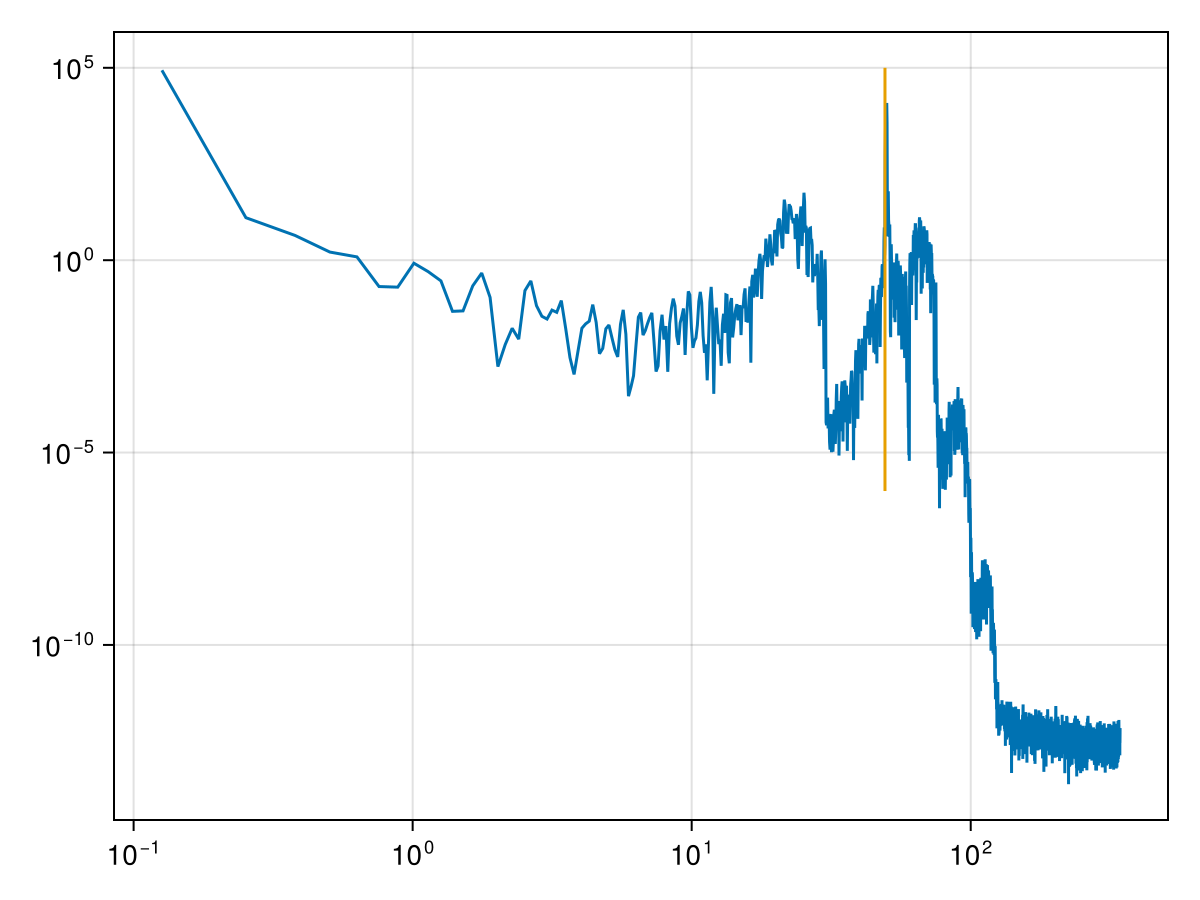

In [45]:
dt = ts[2]-ts[1]
Npos = Int((Nsnapshots - 1)//2)

grid = TwoDGrid(; Lx=2π, nx=1024)
k = grid.kr[23]
l = grid.l[45]
Ω = sqrt.(9 + k^2 + l^2)
ω = fftshift(fftfreq(Nsnapshots-1, 1/dt)) * 2*pi
uhw = fftshift(fft(uh .* window))
vhw = fftshift(fft(vh .* window))
ηhw = fftshift(fft(ηh .* window))
E = abs2.(uhw) + abs2.(vhw) + abs2.(ηhw)
fig = Figure()
ax = Axis(fig[1,1]; xscale=log10, yscale=log10)
lines!(ax, ω[Npos+2:end], E[Npos+2:end])
lines!(ax, [Ω, Ω], [1e-6, 1e5])

fig

In [40]:
ω[Npos]

-0.12629580183144765